<a href="https://colab.research.google.com/github/Sikandarh11/Practice-Machine-Learning-Algorithms/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))  # Adjusted input shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [24]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50


<ipython-input-26-04db54ec8cce>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


125/125 [==============================] - 16s 131ms/step - loss: 0.6939 - accuracy: 0.5290 - val_loss: 0.6831 - val_accuracy: 0.6075
Epoch 2/50
125/125 [==============================] - 15s 122ms/step - loss: 0.6770 - accuracy: 0.5745 - val_loss: 0.6686 - val_accuracy: 0.5663
Epoch 3/50
125/125 [==============================] - 16s 126ms/step - loss: 0.6669 - accuracy: 0.5845 - val_loss: 0.6840 - val_accuracy: 0.5362
Epoch 4/50
125/125 [==============================] - 19s 152ms/step - loss: 0.6528 - accuracy: 0.6100 - val_loss: 0.5956 - val_accuracy: 0.6712
Epoch 5/50
125/125 [==============================] - 15s 117ms/step - loss: 0.6423 - accuracy: 0.6325 - val_loss: 0.5899 - val_accuracy: 0.7250
Epoch 6/50
125/125 [==============================] - 16s 125ms/step - loss: 0.6369 - accuracy: 0.6430 - val_loss: 0.5744 - val_accuracy: 0.7100
Epoch 7/50
125/125 [==============================] - 16s 126ms/step - loss: 0.6159 - accuracy: 0.6780 - val_loss: 0.5445 - val_accuracy: 0.7

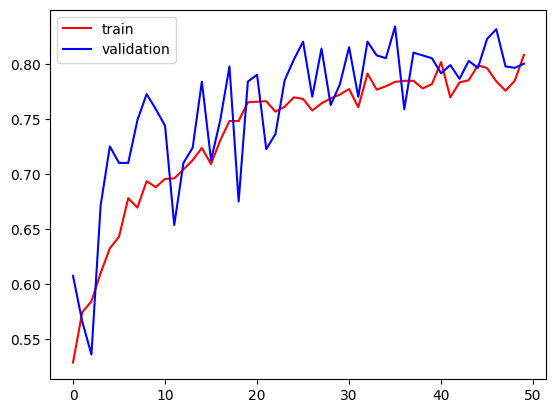

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation')
plt.legend()
plt.show()


1/1 [==============================] - 0s 29ms/step


(array([[1.]], dtype=float32), <matplotlib.image.AxesImage at 0x792b08257460>)

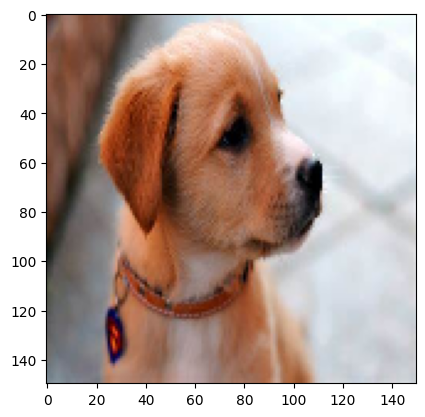

In [37]:
from keras.preprocessing import image
import numpy as np
# Load the image
img = image.load_img('/dog.jpeg', target_size=(150, 150))
# Convert the image to an array
img_array = image.img_to_array(img)
# Expand the dimensions to match the input shape expected by the model
input_data = np.expand_dims(img_array, axis=0)

# Now you can predict using the model
predictions = model.predict(input_data)
predictions, plt.imshow(img)

In [31]:
dog = cv2.resize(dog, (256,256))
dog = dog.reshape(1,256,256,3)
dog.shape

(1, 256, 256, 3)